 # Лабораторная работа №1

## 1) Текстовое описание набора данных

В качестве набора данных я буду использовать набор данных из результатов студентов по экзаменам - https://www.kaggle.com/spscientist/students-performance-in-exams/data

Эта задача является очень актуальной для министерства образования.

Датасет состоит из файла:
- StudentsPerformance.csv

Каждый файл содержит следующие колонки:
- gender - пол студента
- race/ethnicity - этническая принадлежность.
- parental level of education - уровень образования.
- lunch - обед (стандартный или уменьшенный).
- test preparation course - (целевой признак) прохождение подготовки к тесту (нет или пройдена).
- math score - оценка за математику (от 0 до 100).
- reading score - оценка чтение (от 0 до 100).
- writing score - оценка за письменную работу (от 0 до 100).

# Импорт библиотек
Импортируем библиотеки с помощью команды import.

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

In [109]:
data = pd.read_csv('StudentsPerformance.csv')

# 2) Основные характеристики датасета

In [110]:
# Первые 5 строк датасета
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [111]:
# Размер датасета - 1000 строк, 8 колонок
data.shape

(1000, 8)

In [112]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1000


In [113]:
# Список колонок
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [114]:
# Список колонок с типами данных
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [115]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

gender - 0
race/ethnicity - 0
parental level of education - 0
lunch - 0
test preparation course - 0
math score - 0
reading score - 0
writing score - 0


In [116]:
# Основные статистические характеристки набора данных
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [117]:
# Определим уникальные значения для целевого признака
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

Целевой признак является бинарным и содержит только значения none и completed.

In [118]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [119]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [120]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

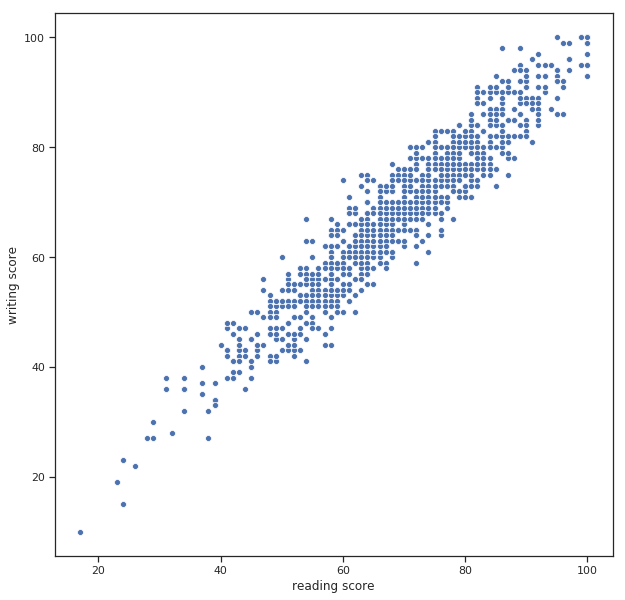

In [121]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='reading score', y='writing score', data=data)

Можно видеть что между полями reading score и writing score пристутствует почти линейная зависимость.

Посмотрим насколько на эту зависимость влияет целевой признак.

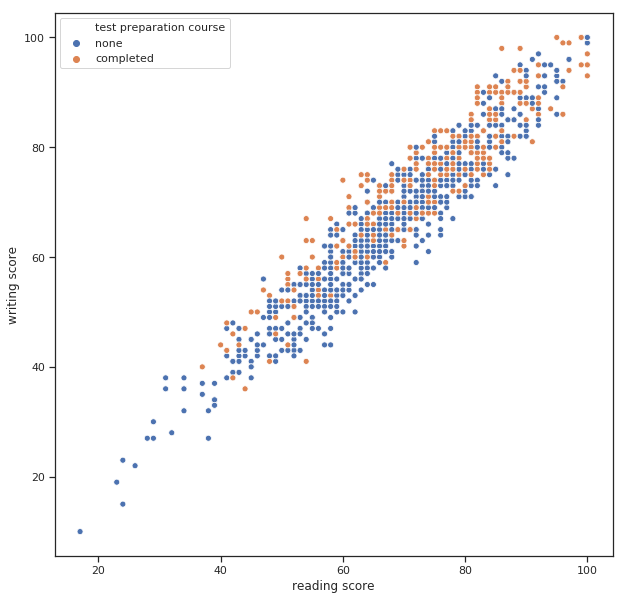

In [122]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='reading score', y='writing score', data=data, hue='test preparation course')

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

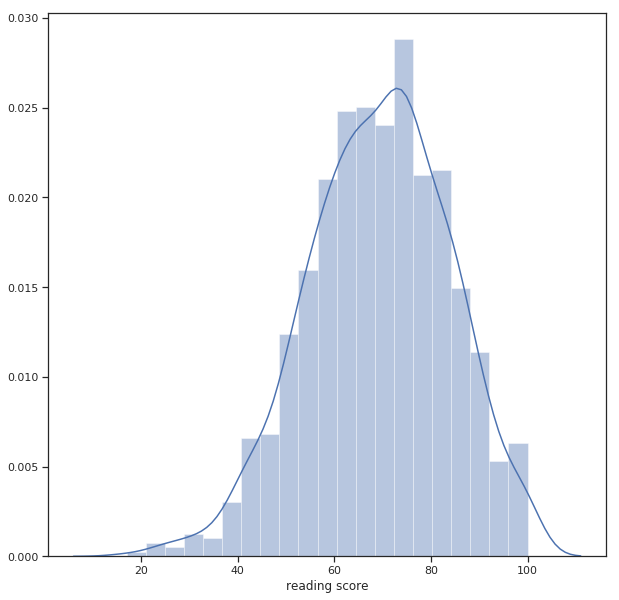

In [123]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['reading score'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

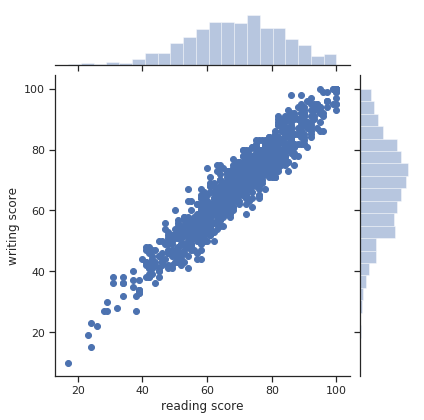

In [124]:
sns.jointplot(x='reading score', y='writing score', data=data)

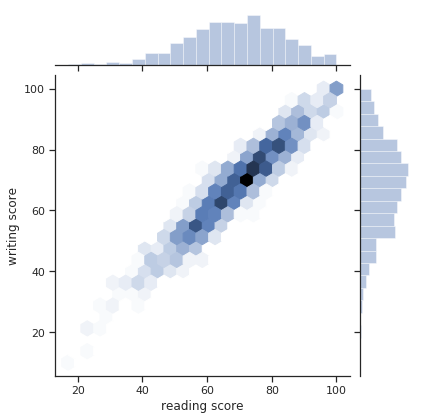

In [125]:
sns.jointplot(x='reading score', y='writing score', data=data, kind="hex")

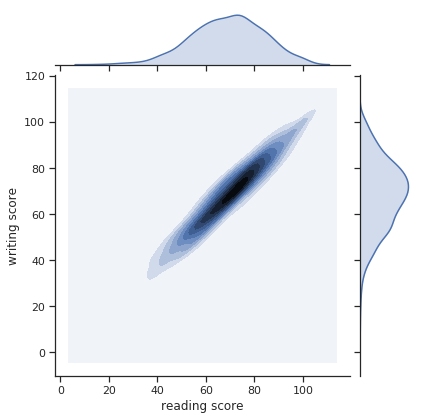

In [126]:
sns.jointplot(x='reading score', y='writing score', data=data, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

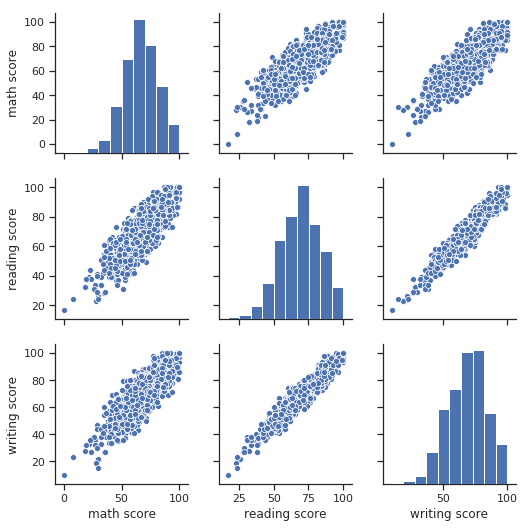

In [127]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

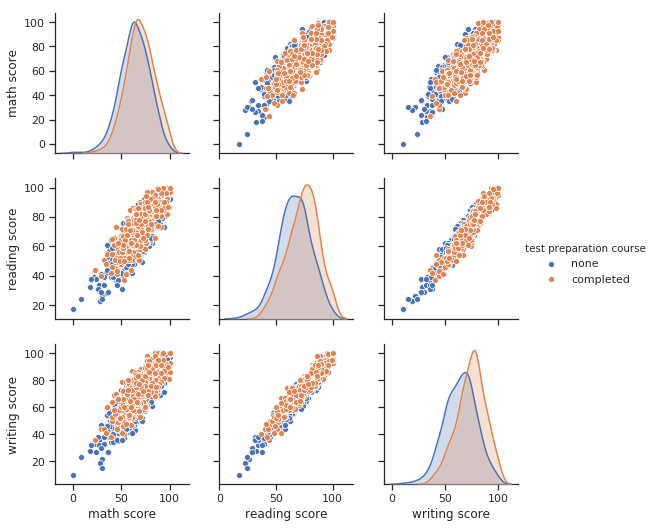

In [128]:
sns.pairplot(data, hue="test preparation course")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

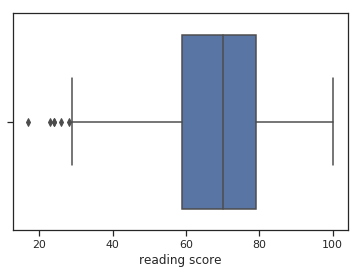

In [129]:
sns.boxplot(x=data['reading score'])

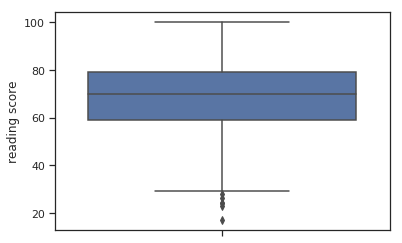

In [130]:
# По вертикали
sns.boxplot(y=data['reading score'])

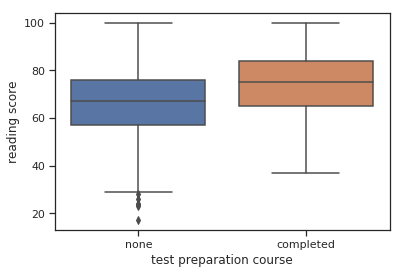

In [131]:
# Распределение параметра reading score сгруппированные по test preparation course.
sns.boxplot(x='test preparation course', y='reading score', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

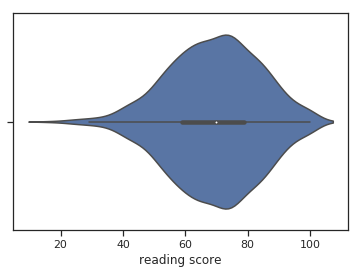

In [132]:
sns.violinplot(x=data['reading score'])

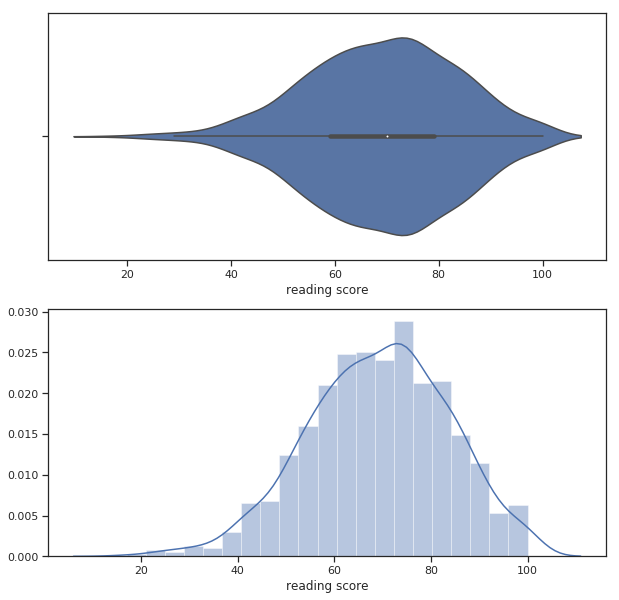

In [133]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['reading score'])
sns.distplot(data['reading score'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

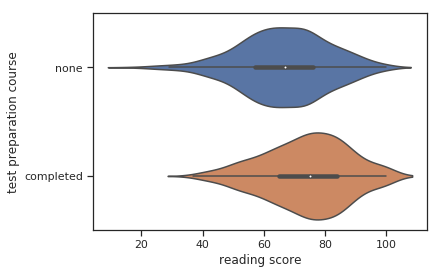

In [134]:
# Распределение параметра reading score сгруппированные по test preparation course.
sns.violinplot(x='reading score', y='test preparation course', data=data)

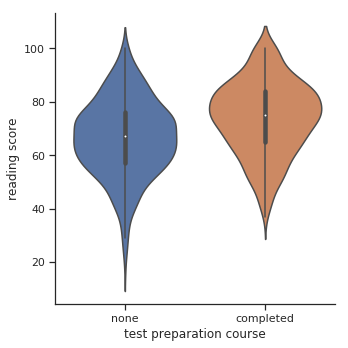

In [135]:
sns.catplot(y='reading score', x='test preparation course', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "test preparation course"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [136]:
#заменим строковые значения целевого признака на числовые
data.loc[data['test preparation course'] == 'none', 'test preparation course'] = 0
data.loc[data['test preparation course'] == 'completed', 'test preparation course'] = 1

data.loc[data['gender'] == 'female', 'gender'] = 0
data.loc[data['gender'] == 'male', 'gender'] = 1

data.loc[data['lunch'] ==  'free/reduced', 'lunch'] = 0
data.loc[data['lunch'] == 'standard', 'lunch'] = 1

data.loc[data['parental level of education'] ==  'some high school', 'parental level of education'] = 0
data.loc[data['parental level of education'] == 'some college', 'parental level of education'] = 0
data.loc[data['parental level of education'] == 'high school', 'parental level of education'] = 0
data.loc[data['parental level of education'] == "bachelor's degree",'parental level of education'] = 1
data.loc[data['parental level of education'] == "master's degree",'parental level of education'] = 1
data.loc[data['parental level of education'] == "associate's degree",'parental level of education'] = 1

In [137]:
#cумма баллов будет более полезным столбцом
data['sum'] = data['math score'] + data['reading score'] + data['writing score']

In [138]:
#удалим избыточные столбцы
del data['math score']
del data['reading score']
del data['writing score']

In [139]:
data.corr()

,gender,parental level of education,lunch,test preparation course,sum
gender,1.000000,-0.033994,0.021372,0.006028,-0.130861
parental level of education,-0.033994,1.000000,-0.014318,0.021971,0.176717
lunch,0.021372,-0.014318,1.000000,-0.017044,0.290064
test preparation course,0.006028,0.021971,-0.017044,1.000000,0.256710
sum,-0.130861,0.176717,0.290064,0.256710,1.000000


In [140]:
data.corr(method='pearson')

,gender,parental level of education,lunch,test preparation course,sum
gender,1.000000,-0.033994,0.021372,0.006028,-0.130861
parental level of education,-0.033994,1.000000,-0.014318,0.021971,0.176717
lunch,0.021372,-0.014318,1.000000,-0.017044,0.290064
test preparation course,0.006028,0.021971,-0.017044,1.000000,0.256710
sum,-0.130861,0.176717,0.290064,0.256710,1.000000


In [141]:
data.corr(method='kendall')

,gender,parental level of education,lunch,test preparation course,sum
gender,1.000000,-0.033994,0.021372,0.006028,-0.113223
parental level of education,-0.033994,1.000000,-0.014318,0.021971,0.131787
lunch,0.021372,-0.014318,1.000000,-0.017044,0.227434
test preparation course,0.006028,0.021971,-0.017044,1.000000,0.209639
sum,-0.113223,0.131787,0.227434,0.209639,1.000000


In [142]:
data.corr(method='spearman')

,gender,parental level of education,lunch,test preparation course,sum
gender,1.000000,-0.033994,0.021372,0.006028,-0.138159
parental level of education,-0.033994,1.000000,-0.014318,0.021971,0.160812
lunch,0.021372,-0.014318,1.000000,-0.017044,0.277524
test preparation course,0.006028,0.021971,-0.017044,1.000000,0.255810
sum,-0.138159,0.160812,0.277524,0.255810,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

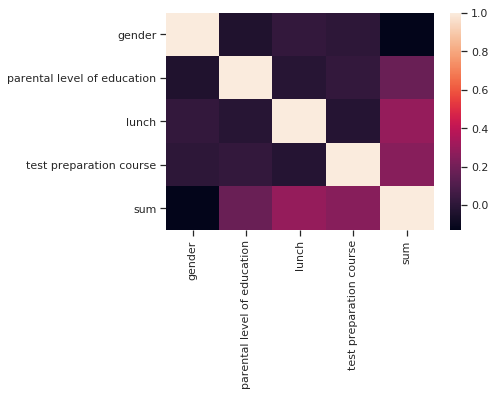

In [143]:
sns.heatmap(data.corr())

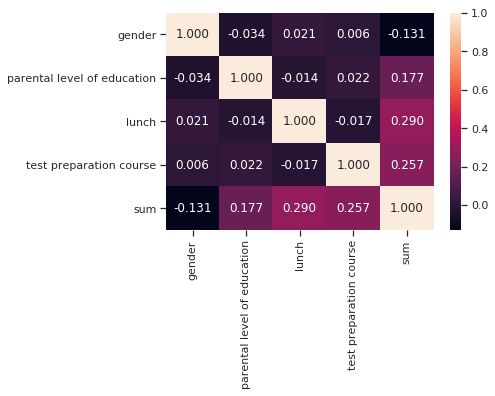

In [144]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

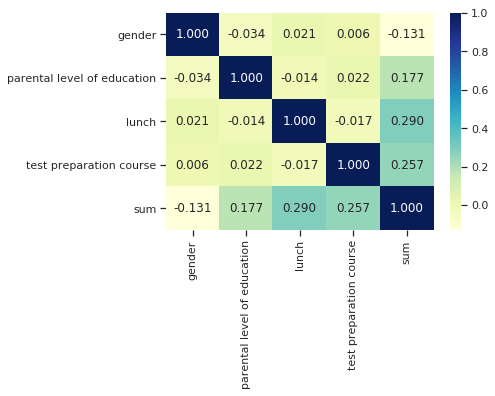

In [145]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

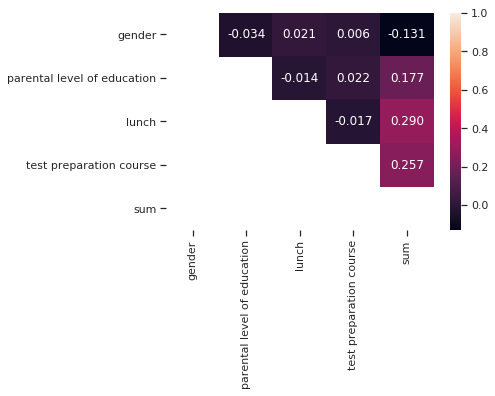

In [146]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

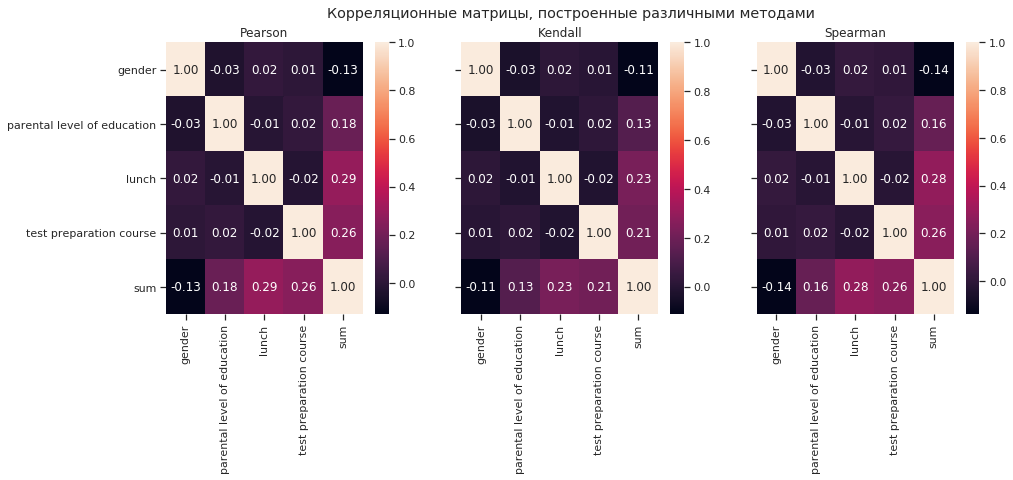

In [147]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

В качестве вывода могу отметить, что прохождение подготовительного теста никак не влияет на результаты теста.